#### Machine Learning
- Initialize Linear Regression Model
- Fit model on training set
- R2 scores for train / test sets
- Plot Actual vs Residual
- Coefficient Analyis on test data of Linear Regression Model
- Manually see predictions for each film
- MAE Score
- Cross Validation

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/train_test_validate_csv/no_trans_base.csv')
# strd_base.head(2)
strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression_Take2/movies_with_dummies.csv')
strd_base.head(2)

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG,PG-13,R
0,The Dark Knight,152,"['Action', 'Crime', 'Drama']",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,...,0,0,0,0,0,0,0,0,1,0
1,The Hunger Games: Catching Fire,146,"['Action', 'Adventure', 'Drama']",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,...,0,0,0,0,0,0,0,0,1,0


In [3]:
strd_base.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Year', 'Budget_Update', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R'],
      dtype='object')

### Initialize LR Model, Train/Test Split, Cross Validation

In [4]:
features_in = ['Budget_Adjust', 'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
'War', 'Western', 'PG','PG-13', 'R', 'Duration']

Y = strd_base['Gross_Adjust']
X = strd_base[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                       test_size=.2,     
                                       random_state=42)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# Initialize Model
model = LinearRegression()

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 


### Fit model on the training set
.fit() method trains the algorithm on the training data, after the model is initialized.

In [10]:
#model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Training R^2 vs Test R^2

#### Is model overfitting?
- Train = Test (low) -- underfit
- Train = Test (high) -- good fit
- Train > Test -- overfit
- Train < Test -- outliers

#### Finding: Slight overfitting train is slightly greater than test. 

In [11]:
#X_train, X_test, y_train, y_test

r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print(f'Train R^2 {r_squared_train}')
print(f'Test  R^2 {r_squared_test}')

Train R^2 0.31815682349174557
Test  R^2 0.2761488720321399


### Get Predictions

In [12]:
predictions = model.predict(X_test)
#predictions

### Plot Actual vs Residual
A residual is a measure of how far away a point is vertically from the regression line. It's the error between a predicted value and the observed actual value
residuals (actual value - predicted value)

Text(0, 0.5, 'Predicted Gross')

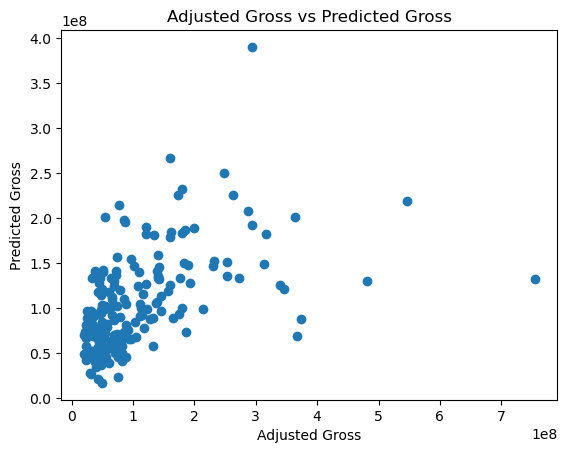

In [13]:
plt.title('Adjusted Gross vs Predicted Gross')
plt.scatter(y_test, predictions)
plt.xlabel('Adjusted Gross')
plt.ylabel('Predicted Gross')
#how to review chart: Look at bottom of chart and locate 7 and see the dot near 7. This is adjusted gross. When you look at dot near seven it's at approx 1.25 and this is what was predicted. 1.25 was predicted instead of actual which is near 7.

Text(0, 0.5, 'Over_Under Prediction Amount')

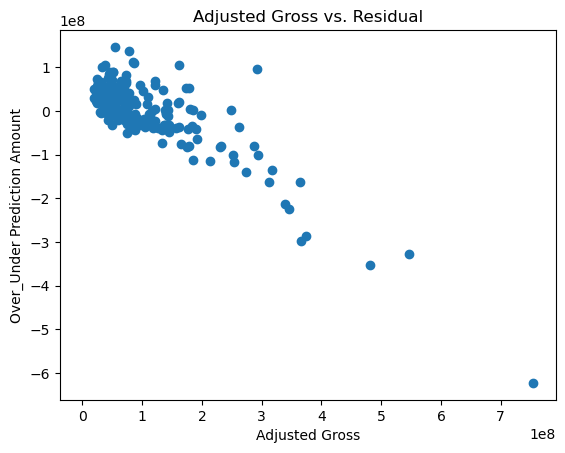

In [14]:
# Plot Actual vs Residual

lin_reg_residuals = predictions - y_test

plt.scatter(y_test, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Adjusted Gross vs. Residual")
plt.xlabel('Adjusted Gross')
#did it over predict or under predict? 
plt.ylabel('Over_Under Prediction Amount')

Findings: 

We need residuals of equal amounts - see gold standard charts. Heteroskedasticity. We don't see equal amounts so there's a problem with our residuals. 

We can see we're underpredicting. 

7.5 million is under predicted by -6. identify the blue dot near 7 on the x axis is near 1.5 on the y axis. So 7.5 million is being predicted as approximately 1.5 million. 

Hypothesize that big blockbusters are creating the problem. This is why we created the chart below with 'gross' column. The 'gross_adjust' has inflation. 

Future work: What would be consistent with blockbusters - what's happening to create the underprediction? 
In presentation state this as future work: "Going forward address blockbusters." 

In [15]:
strd_base.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Year', 'Budget_Update', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R'],
      dtype='object')

In [16]:
#looking at franchise
strd_base.sort_values('Gross_Adjust', ascending = False).head(10)

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG,PG-13,R
3,Jurassic Park,127,"['Action', 'Adventure', 'Sci-Fi']",PG-13,402450000.0,Steven Spielberg,Sam Neill,1993,63000000.0,118139169.6,...,0,0,1,0,0,0,0,0,1,0
0,The Dark Knight,152,"['Action', 'Crime', 'Drama']",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,...,0,0,0,0,0,0,0,0,1,0
145,The Towering Inferno,165,"['Action', 'Drama', 'Thriller']",PG,116000000.0,John Guillermin,Paul Newman,1974,14000000.0,76948884.4,...,0,0,0,0,1,0,0,1,0,0
18,Beverly Hills Cop,105,"['Action', 'Comedy', 'Crime']",R,234760000.0,Martin Brest,Eddie Murphy,1984,13000000.0,33903849.9,...,0,0,0,0,0,0,0,0,0,1
225,The Poseidon Adventure,117,"['Action', 'Adventure', 'Drama']",PG,84560000.0,Ronald Neame,Gene Hackman,1972,5000000.0,32412679.4,...,0,0,0,0,0,0,0,1,0,0
365,Thunderball,130,"['Action', 'Adventure', 'Thriller']",PG,63600000.0,Terence Young,Sean Connery,1965,9000000.0,77420000.0,...,0,0,0,0,1,0,0,1,0,0
1,The Hunger Games: Catching Fire,146,"['Action', 'Adventure', 'Drama']",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,...,0,0,0,0,0,0,0,0,1,0
215,The Trial of Billy Jack,170,"['Action', 'Drama', 'Music']",PG,89000000.0,Tom Laughlin,Tom Laughlin,1974,2500000.0,13740872.2,...,0,0,0,0,0,0,0,1,0,0
2,The Hunger Games,142,"['Action', 'Adventure', 'Sci-Fi']",PG-13,408010000.0,Gary Ross,Jennifer Lawrence,2012,78000000.0,92056674.0,...,0,0,1,0,0,0,0,0,1,0
9,The Sixth Sense,107,"['Drama', 'Mystery', 'Thriller']",PG-13,293510000.0,M. Night Shyamalan,Bruce Willis,1999,40000000.0,65058823.5,...,1,0,0,0,1,0,0,0,1,0


In [17]:
#looking at franchise
strd_base.sort_values('Gross', ascending = False).head(10)

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG,PG-13,R
0,The Dark Knight,152,"['Action', 'Crime', 'Drama']",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,...,0,0,0,0,0,0,0,0,1,0
1,The Hunger Games: Catching Fire,146,"['Action', 'Adventure', 'Drama']",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,...,0,0,0,0,0,0,0,0,1,0
2,The Hunger Games,142,"['Action', 'Adventure', 'Sci-Fi']",PG-13,408010000.0,Gary Ross,Jennifer Lawrence,2012,78000000.0,92056674.0,...,0,0,1,0,0,0,0,0,1,0
3,Jurassic Park,127,"['Action', 'Adventure', 'Sci-Fi']",PG-13,402450000.0,Steven Spielberg,Sam Neill,1993,63000000.0,118139169.6,...,0,0,1,0,0,0,0,0,1,0
4,Furious 7,137,"['Action', 'Crime', 'Thriller']",PG-13,353010000.0,James Wan,Vin Diesel,2015,190000000.0,217217752.3,...,0,0,0,0,1,0,0,0,1,0
5,The Hunger Games: Mockingjay - Part 1,123,"['Action', 'Adventure', 'Sci-Fi']",PG-13,337140000.0,Francis Lawrence,Jennifer Lawrence,2014,125000000.0,143076042.5,...,0,0,1,0,0,0,0,0,1,0
6,Joker,122,"['Crime', 'Drama', 'Thriller']",R,335450000.0,Todd Phillips,Joaquin Phoenix,2019,55000000.0,58294316.2,...,0,0,0,0,1,0,0,0,0,1
7,Skyfall,143,"['Action', 'Adventure', 'Thriller']",PG-13,304360000.0,Sam Mendes,Daniel Craig,2012,200000000.0,236042753.7,...,0,0,0,0,1,0,0,0,1,0
8,The Twilight Saga: Eclipse,124,"['Action', 'Adventure', 'Drama']",PG-13,300530000.0,David Slade,Kristen Stewart,2010,68000000.0,84501045.6,...,0,0,0,0,0,0,0,0,1,0
9,The Sixth Sense,107,"['Drama', 'Mystery', 'Thriller']",PG-13,293510000.0,M. Night Shyamalan,Bruce Willis,1999,40000000.0,65058823.5,...,1,0,0,0,1,0,0,0,1,0


### Coefficient Analysis on Linear Regression Model
- Model must be fitted for it to work
- The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately.

#### Coefficients on Test Set

In [18]:
test_fit = model.fit(X_test,y_test)
coefficients_tst = pd.DataFrame(test_fit.coef_,X.columns, columns=['Coefficient'])
coefficients_tst.round(2)


,Coefficient
Budget_Adjust,0.39
Action,-20658701.63
Adventure,19793585.00
Animation,-54468082.93
Biography,-57640257.49
Comedy,12575077.35
Crime,-10495540.63
Drama,-28094114.77
Family,0.00
Fantasy,-7649883.02


#### Intercept for test

In [19]:
test_fit.intercept_

-48475925.56400858

##### Manually See Predictions by Film

In [20]:
#Visual Review
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df_comparison = pd.merge(df_results, strd_base, how="inner", left_on="Actual", right_on='Gross_Adjust')
df_comparison.columns

Index(['Actual', 'Predicted', 'Title', 'Duration', 'Genre', 'Rating', 'Gross',
       'Director', 'Lead', 'Year', 'Budget_Update', 'Budget_Adjust',
       'Gross_Adjust', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'PG', 'PG-13', 'R'],
      dtype='object')

In [21]:
strd_base.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Year', 'Budget_Update', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R'],
      dtype='object')

### See Predictions by Row

In [22]:
#manually shows comparison. Change out features to see how prediction changes. 
pred_df = df_comparison[['Title','Predicted', 'Actual','Budget_Adjust', 'Action','Adventure', 
                         'Animation', 'Biography', 'Comedy', 'Crime', 'Drama','Family', 'Fantasy', 
                         'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
                         'War', 'Western', 'PG','PG-13', 'R', 'Duration']]
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
pred_df

,Title,Predicted,Actual,Budget_Adjust,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Sport,War,Western,PG,PG-13,R,Duration
0,Quarantine,"34,761,529.31","39,883,509.80","15,102,622.80",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,89
1,Us,"73,616,192.21","185,566,707.00","21,197,933.20",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,116
2,Nowhere to Run,"48,950,609.10","41,611,240.80","28,128,373.70",1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,94
3,2 Guns,"81,969,633.40","87,947,740.10","70,953,738.20",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,109
4,Space Cowboys,"145,685,617.18","142,345,796.70","102,282,520.30",1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Absence of Malice,"181,936,204.11","121,385,020.90","35,771,617.20",0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,116
221,The Phantom of the Opera,"157,375,785.74","73,544,901.50","100,412,387.50",0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,143
222,The November Man,"74,623,980.77","28,592,316.30","17,169,125.10",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,108
223,The Lazarus Effect,"28,053,243.39","29,495,884.30","3,772,729.40",0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,83


#### MAE Score

In [24]:
actual = pred_df['Actual']
pred = pred_df['Predicted']

mae(actual, pred)

48471572.60522132

### Cross Validation Scores
- Intent of section is to familiarize with cross validation
- Scores returned as list: one score per fold

In [5]:
# Cross val on train
print(cross_val_score(model, X_train, y_train, cv=5))

[0.26288526 0.28615593 0.29424418 0.21048882 0.23906449]


In [6]:
print(cross_val_score(model, X, Y, cv=5))

[-1.63327638 -0.07732386 -0.48675353 -1.30845023 -4.67227158]


###### Mean Score with Standard Deviation

In [7]:
#average score of all this is the score. 
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_root_mean_squared_error')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of -81803407.40 with a standard deviation of 43461653.53
